# Predicting which team will win a football match

The purpose of this project is to use machine learning in order to make predictions regarding football matches. 
We have 5 .csv files, each file containing different data which might help in make predictions.

In [1471]:
# importing neccesary libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools

%matplotlib inline

### Reading data from the files

In [1472]:
# Read data from .csv files 

loc = "voetbal_1956-20220309/"

raw_cards_file = pd.read_csv (loc + '_cards.csv')
raw_goals_file = pd.read_csv (loc + '_goals.csv')
raw_matches_file = pd.read_csv (loc + '_matches.csv')
raw_players_file = pd.read_csv (loc + '_players.csv')
raw_subs_file = pd.read_csv (loc + '_subs.csv')

### Goals

In [1473]:
# Method used to overwrite values found in column 'assist'
def assist(value):
    if pd.notna(value):
        return 1
    else:
        return 0

In [1474]:
# a function to remove duplicates 
def DuplicatesGoals(previousName: str, newName: str ):
        raw_goals_file["home"].replace({previousName: newName }, inplace=True)
        raw_goals_file["away"].replace({previousName: newName }, inplace=True)
        raw_goals_file["team"].replace({previousName: newName }, inplace=True)

# a function used to get the last season
def toOneSeason(season):
    return season[5:len(season)]



In [1475]:
# Some clubs have different names 
# We replace it to one name 
DuplicatesGoals("afc-ajax", "ajax-amsterdam")
DuplicatesGoals("willem-ii", "willem-ii-tilburg")

# convert the season to int 
raw_goals_file['saison'] = raw_goals_file['saison'].apply(toOneSeason)
raw_goals_file['saison'] = raw_goals_file['saison'].astype(int)

# filter the last 10 seasons 
filterSeason = raw_goals_file[(raw_goals_file['saison'] >= 2012)]

# make new dataframe in order to aggregate
dfGoals = pd.DataFrame(filterSeason)

# We use assist function for both 'assist' and 'player' colunms to count the assists and goals for each game
assistNumber = raw_goals_file['assist'].apply(assist)
goalNumber = raw_goals_file['player'].apply(assist)

dfGoals['assistNumber'] = assistNumber
dfGoals['goalNumber'] = goalNumber

# we drop the unneccesary columns 
dfGoals.drop(columns=['new_score','type','minute','round'])

,Unnamed: 0,saison,home,away,team,player,assist,assistNumber,goalNumber
50894,0,2012,ado-den-haag,ajax-amsterdam,ajax-amsterdam,Jody Lukoki,Theo Janssen,1,1
50895,1,2012,ado-den-haag,ajax-amsterdam,ajax-amsterdam,Jan Vertonghen,Ismaïl Aissati,1,1
50896,2,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Brett Holman,1,1
50897,3,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Maarten Martens,1,1
50898,4,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Rasmus Elm,1,1
...,...,...,...,...,...,...,...,...,...
60864,639,2022,willem-ii-tilburg,sc-cambuur,willem-ii-tilburg,Godfried Roemeratoe,Anargyros Kampetsis,1,1
60865,640,2022,willem-ii-tilburg,sc-cambuur,sc-cambuur,Mitchell Paulissen,NaN,0,1
60866,641,2022,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Bryan Smeets,1,1
60867,642,2022,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Sven Mijnans,1,1


In [1476]:
# the best player of Ajax (Assist, Goals)
filterAjaxPlayers = dfGoals[(dfGoals['team'] == "ajax-amsterdam")]
playersAssistAjax = filterAjaxPlayers.groupby('player')['assistNumber'].sum()
print(playersAssistAjax.nlargest(n=5))

playersGoalsAjax = filterAjaxPlayers.groupby('player')['goalNumber'].sum()
print(playersGoalsAjax.nlargest(n=5))

player
Davy Klaassen          48
Klaas-Jan Huntelaar    37
Hakim Ziyech           29
Dušan Tadić            28
Kasper Dolberg         28
Name: assistNumber, dtype: int64
player
Davy Klaassen          61
Dušan Tadić            61
Lasse Schöne           49
Klaas-Jan Huntelaar    45
Hakim Ziyech           38
Name: goalNumber, dtype: int64


In [1477]:
# the best player of Psv (Assist, Goals)
filterPsvPlayers = dfGoals[(dfGoals['team'] == "psv-eindhoven")]
playersAssistPsv = filterPsvPlayers.groupby('player')['assistNumber'].sum()
print(playersAssistPsv.nlargest(n=5))

playersGoalsPsv = filterPsvPlayers.groupby('player')['goalNumber'].sum()
print(playersGoalsPsv.nlargest(n=5))


player
Luuk de Jong           78
Donyell Malen          33
Georginio Wijnaldum    26
Jürgen Locadia         26
Gastón Pereiro         23
Name: assistNumber, dtype: int64
player
Luuk de Jong           94
Jürgen Locadia         45
Gastón Pereiro         44
Georginio Wijnaldum    41
Donyell Malen          40
Name: goalNumber, dtype: int64


Text(0, 0.5, 'Assist')

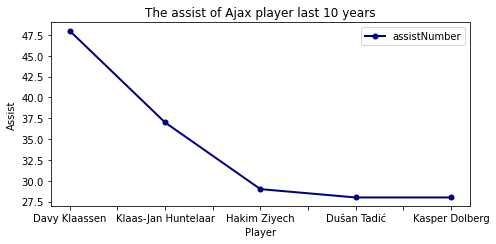

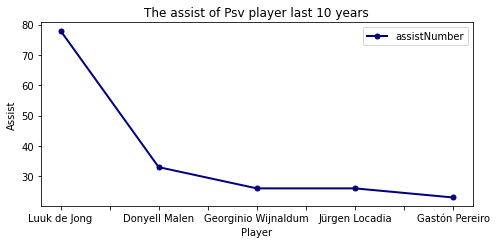

In [1517]:
# plot Assist
dfAjaxAssist = pd.DataFrame(playersAssistAjax.nlargest(n=5))
ax = dfAjaxAssist.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The assist of Ajax player last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Assist")

dfPsvAssist = pd.DataFrame(playersAssistPsv.nlargest(n=5))
ax = dfPsvAssist.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The assist of Psv player last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Assist")


Text(0, 0.5, 'Goals')

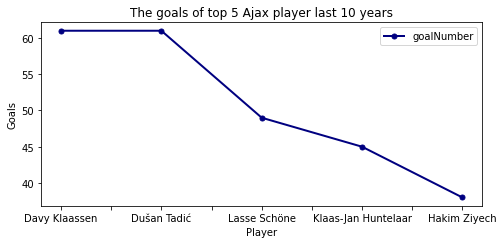

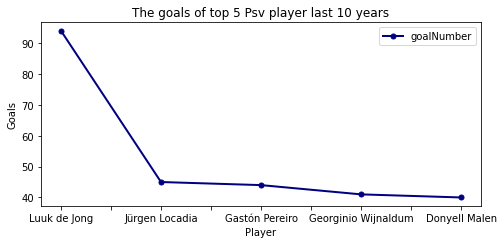

In [1508]:
# plot Goals
dfAjaxGoals = pd.DataFrame(playersGoalsAjax.nlargest(n=5))
ax = dfAjaxGoals.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The goals of top 5 Ajax player last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

dfPsvGoals = pd.DataFrame(playersGoalsPsv.nlargest(n=5))
ax = dfPsvGoals.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The goals of top 5 Psv player last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

In [1479]:
# The best 3 player in the Ajax - Psv Match  in psv Stadium (Ajax stats)
filterAjaxPlayersInPsvStudium = dfGoals[(dfGoals['team'] == "ajax-amsterdam") & (dfGoals['home'] == "psv-eindhoven")]
playersAssistAjaxInPsvStudium = filterAjaxPlayersInPsvStudium.groupby('player')['assistNumber'].sum()
print(playersAssistAjaxInPsvStudium.nlargest(n=5))

playersGoalsAjaxInPsvStudium = filterAjaxPlayersInPsvStudium.groupby('player')['goalNumber'].sum()
print(playersGoalsAjaxInPsvStudium.nlargest(n=5))

player
Anwar El Ghazi       2
Arkadiusz Milik      1
Brian Brobbey        1
Christian Eriksen    1
Derk Boerrigter      1
Name: assistNumber, dtype: int64
player
Anwar El Ghazi         2
Kolbeinn Sigþórsson    2
Arkadiusz Milik        1
Brian Brobbey          1
Christian Eriksen      1
Name: goalNumber, dtype: int64


In [1480]:
# The best 3 player in the Ajax - Psv Match  in psv Stadium (psv stats)
filterPsvPlayersInPsvStudium = dfGoals[(dfGoals['team'] == "psv-eindhoven") & (dfGoals['away'] == "ajax-amsterdam")]
playersAssistPsvInPsvStudium = filterPsvPlayersInPsvStudium.groupby('player')['assistNumber'].sum()
print(playersAssistPsvInPsvStudium.nlargest(n=5))

playersGoalsPsvInPsvStudium = filterPsvPlayersInPsvStudium.groupby('player')['goalNumber'].sum()
print(playersGoalsPsvInPsvStudium.nlargest(n=5))

player
Luuk de Jong      3
Donyell Malen     1
Hirving Lozano    1
Jeremain Lens     1
Ji-Sung Park      1
Name: assistNumber, dtype: int64
player
Luuk de Jong      3
Gastón Pereiro    2
Jeremain Lens     2
Tim Matavž        2
Donyell Malen     1
Name: goalNumber, dtype: int64


Text(0, 0.5, 'Goals')

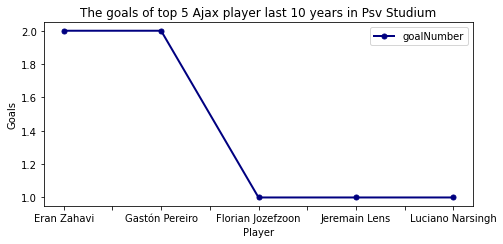

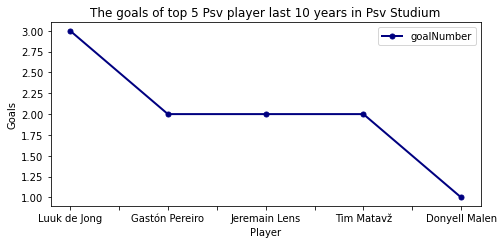

In [1509]:
# plot Goals Ajax vs Psv in Psv Studium
dfAjaxGoalsinPsvStudium = pd.DataFrame(playersGoalsAjaxInPsvStudium.nlargest(n=5))
ax = dfAjaxGoalsinPsvStudium.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The goals of top 5 Ajax player last 10 years in Psv Studium')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

dfPsvGoalsinPsvStudium = pd.DataFrame(playersGoalsPsvInPsvStudium.nlargest(n=5))
ax = dfPsvGoalsinPsvStudium.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The goals of top 5 Psv player last 10 years in Psv Studium')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

In [1481]:
# The best 3 player in the Ajax - Psv Match  in Ajax Stadium (Ajax stats)
filterAjaxPlayersInAjaxStudium = dfGoals[(dfGoals['team'] == "ajax-amsterdam") & (dfGoals['away'] == "psv-eindhoven")]
playersAssistAjaxInAjaxStudium = filterAjaxPlayersInAjaxStudium.groupby('player')['assistNumber'].sum()
print(playersAssistAjaxInAjaxStudium.nlargest(n=5))

playersGoalsAjaxInAjaxStudium = filterAjaxPlayersInAjaxStudium.groupby('player')['goalNumber'].sum()
print(playersGoalsAjaxInAjaxStudium.nlargest(n=5))

player
Antony               2
Anwar El Ghazi       1
David Neres          1
Davy Klaassen        1
Donny van de Beek    1
Name: assistNumber, dtype: int64
player
Antony           2
David Neres      2
Davy Klaassen    2
Dušan Tadić      2
Quincy Promes    2
Name: goalNumber, dtype: int64


In [1482]:
# The best 3 player in the Ajax - Psv Match  in Ajax Stadium (Psv stats)
filterAjaxPlayersInPsvStudium = dfGoals[(dfGoals['team'] == "psv-eindhoven") & (dfGoals['home'] == "ajax-amsterdam")]
playersAssistAjaxInPsvStudium = filterAjaxPlayersInPsvStudium.groupby('player')['assistNumber'].sum()
print(playersAssistAjaxInPsvStudium.nlargest(n=5))

playersGoalsAjaxInPsvStudium = filterAjaxPlayersInPsvStudium.groupby('player')['goalNumber'].sum()
print(playersGoalsAjaxInPsvStudium.nlargest(n=5))

player
Eran Zahavi         2
Gastón Pereiro      1
Jeremain Lens       1
Luciano Narsingh    1
Luuk de Jong        1
Name: assistNumber, dtype: int64
player
Eran Zahavi          2
Gastón Pereiro       2
Florian Jozefzoon    1
Jeremain Lens        1
Luciano Narsingh     1
Name: goalNumber, dtype: int64


Text(0, 0.5, 'Goals')

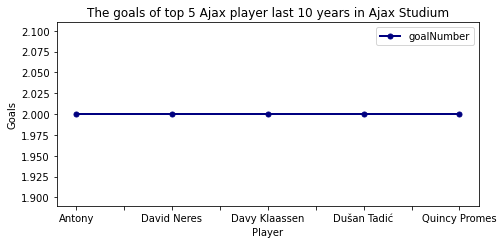

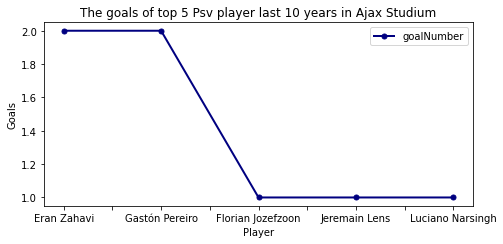

In [1510]:
# plot Goals Ajax vs Psv in Ajax Studium
dfAjaxGoalsinAjaxStudium = pd.DataFrame(playersGoalsAjaxInAjaxStudium.nlargest(n=5))
ax = dfAjaxGoalsinAjaxStudium.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The goals of top 5 Ajax player last 10 years in Ajax Studium')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

dfPsvGoalsinAjaxStudium = pd.DataFrame(playersGoalsAjaxInPsvStudium.nlargest(n=5))
ax = dfPsvGoalsinAjaxStudium.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The goals of top 5 Psv player last 10 years in Ajax Studium')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

In [1483]:
# Home team assist and goals
filterAssist = dfGoals[(dfGoals['assistNumber'] == 1)]
groupByHomeAssist = filterAssist.groupby('home')['assistNumber'].sum()
print(groupByHomeAssist.head())

# goals 
groupByHomeGoals = dfGoals.groupby('home')['goalNumber'].sum()
print(groupByHomeGoals.tail(10))

home
ado-den-haag      339
ajax-amsterdam    443
az-alkmaar        368
de-graafschap     101
fc-dordrecht       36
Name: assistNumber, dtype: int64
home
psv-eindhoven        634
rkc-waalwijk         253
roda-jc-kerkrade     287
sbv-excelsior        314
sc-cambuur           189
sc-heerenveen        561
sparta-rotterdam     238
vitesse              544
vvv-venlo            317
willem-ii-tilburg    417
Name: goalNumber, dtype: int64


In [1484]:
# Away assist and goals 
groupByAwayAssist = filterAssist.groupby('away')['assist'].sum()
print(groupByAwayAssist.head())

# goals 
groupByAwayGoals = filtered_assists.groupby('away')['player'].sum()
print(groupByAwayGoals.head(101))

away
ado-den-haag      Nicolás LodeiroMiralem SulejmaniChristian Erik...
ajax-amsterdam    Theo JanssenIsmaïl AissatiSjoerd OvergoorKolbe...
az-alkmaar        Brett HolmanMaarten MartensRasmus ElmJóhann Gu...
de-graafschap     Tjaronn CheryGil VermouthJens ToornstraRydell ...
fc-dordrecht      Xander HoutkoopAnwar El GhaziDavy KlaassenDavy...
Name: assist, dtype: object
away
ado-den-haag           Piet van der KuilLex RijnvisGerrie AlthoffPiet...
afc-dws                Harrie VrekenCarol SchuurmanTheo van Doornevel...
ajax-amsterdam         Ben WeeninkLoek den EdelWilly SchmidtPiet van ...
az-alkmaar             Henny den EngelseJohan EngelsmaJohan EngelsmaH...
blauw-wit              Mick ClavanGuus van HamErwin SparendamPiet Koe...
bvc-amsterdam          Rinus MichelsHan TolmeijerHenk van der SluisGé...
cambuur-leeuwarden     Mitar MrkelaMitar MrkelaRonald HammingJos Roos...
de-graafschap          Johan NeeskensJohnny RepJohnny RepJohan Neeske...
de-volewijckers        Maarten Trommel

### Cards

In [1485]:
# The cards have different names and we convert them to numbers in order to count them 
df_card_filtered = raw_cards_file[(raw_cards_file['type'] == 'rode kaart') | 
                                  (raw_cards_file['type'] == 'gele kaart') |
                                  (raw_cards_file['type'] == 'gele') |
                                  (raw_cards_file['type'] == 'kaartgele') |
                                  (raw_cards_file['type'] == 'rode') |
                                  (raw_cards_file['type'] == 'kaartrode')  ]
            
df_card_filtered["type"].replace({"rode kaart": 2, "gele kaart": 1, "gele": 1 , "kaartgele" : 1 , "rode":2, "kaartrode" : 2 }, inplace=True)

# filter the home and away team 
filterHomeTeam = df_card_filtered[ (df_card_filtered['home'] == df_card_filtered['team'])]
filterAwayTeam = df_card_filtered[ (df_card_filtered['away'] == df_card_filtered['team'])]

C:\Users\malja\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1486]:
# Away yellow cards
filterAwayYellowCard = filterAwayTeam[(filterAwayTeam['type'] == 1)]
groupByAwayYellowCard = filterAwayYellowCard.groupby('away').sum()
groupByAwayYellowCard['type'].head(10)

print(f'{len(filterAwayYellowCard.index)} yellow cards is made by away team ')

17920 yellow cards is made by away team 


In [1487]:
# Away red cards
filterAwayRedCard = filterAwayTeam[(filterAwayTeam['type'] == 2)]
print(f'{len(filterAwayRedCard.index)} red cards is made by away team ')

679 red cards is made by away team 


In [1488]:
# Home yellow cards
filterHomeYellowCard = filterHomeTeam[(filterHomeTeam['type'] == 1)]
groupByHomeYellowCard = filterHomeYellowCard.groupby('home').sum()
groupByHomeYellowCard

print(f'{len(filterHomeYellowCard.index)} yellow cards is made by home team ')

12578 yellow cards is made by home team 


In [1489]:
# Home red cards 
filterHomeRedCard = filterHomeTeam[(filterHomeTeam['type'] == 2)]
print(f'{len(filterHomeRedCard.index)} red cards is made by home team ')

415 red cards is made by home team 


### Players

In [1490]:
# we drop the unneccesary columns 
raw_players_file.drop(columns=['round'])

,index,saison,home,away,team,player,started
0,0,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,eddy-pieters-graafland,True
1,1,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,cor-geelhuizen,True
2,2,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,ger-van-mourik,True
3,3,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,ad-visser,True
4,4,1956-1957,afc-ajax,bvc-amsterdam,afc-ajax,piet-ouderland,True
...,...,...,...,...,...,...,...
531095,9368,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,vito-van-crooij,False
531096,9369,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,mario-engels,False
531097,9370,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,benjamin-van-leer,False
531098,9371,2021-2022,willem-ii,sparta-rotterdam,sparta-rotterdam,tim-coremans,False


In [1491]:
# we replace the 'started' column to numbers in order to count them
raw_players_file["started"].replace({True: 1, False: 0}, inplace=True)

# filter the home and away team 
filterHomeTeamPlayers = raw_players_file[ (raw_players_file['home'] == raw_players_file['team'])]
filterAwayTeamPlayers = raw_players_file[ (raw_players_file['away'] == raw_players_file['team'])]

# How much players play Home
filterStartedPlayersHome = filterHomeTeamPlayers[ (filterHomeTeamPlayers['started'] == 1)]
print(f'{len(filterStartedPlayersHome.index)} players play home')
# How much players did not play Home
filterNotStartedPlayersHome = filterHomeTeamPlayers[ (filterHomeTeamPlayers['started'] == 0)]
print(f'{len(filterNotStartedPlayersHome.index)} players did not play home')

# How much players play Away
filterStartedPlayersAway = filterAwayTeamPlayers[ (filterAwayTeamPlayers['started'] == 1)]
print(f'{len(filterStartedPlayersAway.index)} players play away')
# How much players did not play Away
filterNotStartedPlayersAway = filterAwayTeamPlayers[ (filterAwayTeamPlayers['started'] == 0)]
print(f'{len(filterNotStartedPlayersAway.index)} players did not play away')

212686 players play home
49729 players did not play home
217217 players play away
51468 players did not play away


### Matches

In [1492]:
# we drop the unneccesary columns 
filtered_matches = raw_matches_file.drop(columns=['stadium','home_first_card','home_last_card',
                                                 'away_first_card', 'time','date','round',
                                                 'spectators', 'ref','linesman1','linesman2', 'away_last_card',
                                                 'home_yellow', 'home_yelred', 'away_yellow','first_goal', 'last_goal',
                                                  'away_red','home_red', 'away_yelred'])

# drop the empty rows
filtered_matches.dropna()
filtered_matches

,Unnamed: 0,saison,home,away,home_score,away_score
0,0,1956-1957,afc-ajax,bvc-amsterdam,2,3
1,1,1956-1957,afc-ajax,fc-den-bosch,1,0
2,2,1956-1957,afc-ajax,fc-utrecht,1,2
3,3,1956-1957,afc-ajax,feyenoord,1,0
4,4,1956-1957,afc-ajax,fortuna-54,0,2
...,...,...,...,...,...,...
19925,301,2021-2022,willem-ii,rkc-waalwijk,3,1
19926,302,2021-2022,willem-ii,sc-cambuur,1,3
19927,303,2021-2022,willem-ii,sc-heerenveen,0,0
19928,304,2021-2022,willem-ii,sparta-rotterdam,0,3


In [1493]:
# WinningHomeTeamFilter
WinningHomeTeamFilter = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score'])]
print(f'The Home team won {len(WinningHomeTeamFilter.index)} matches')

# WinningAwayTeamFilter
WinningAwayTeamFilter = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score'])]
print(f'The Away team won {len(WinningAwayTeamFilter.index)} matches')

# DrawFilter
DrawTeamFilter = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score'])]
print(f'The draw was in {len(DrawTeamFilter.index)} matches')

The Home team won 9458 matches
The Away team won 5416 matches
The draw was in 5056 matches


### Changing the players

In [1494]:
# How much subs did the home and away teams made 
# we drop the unneccesary columns 
filtered_subs = raw_subs_file.drop(columns=['minute','player','round','saison'])
filtered_subs["in"].replace({False: 0, True: 1 }, inplace=True)

filterHomeTeamSubs = filtered_subs[ (filtered_subs['home'] == filtered_subs['team'])]
filterAwayTeamSubs = filtered_subs[ (filtered_subs['away'] == filtered_subs['team'])]

# How much subs Home team made
filterSubsHome = filterHomeTeamSubs[ (filterHomeTeamSubs['in'] == 1)]
print(f'{len(filterSubsHome.index)} subs the home team made')

# How much subs Away team made
filterSubsAway = filterAwayTeamSubs[ (filterAwayTeamSubs['in'] == 1)]
print(f'{len(filterSubsAway.index)} subs the Away team made')

31728 subs the home team made
32505 subs the Away team made


### AJAX VS PSV Stats

#### Goals

In [1495]:
ajaxGoalsHome = filterAssist[ (filterAssist['home'] == 'ajax-amsterdam')]

print(f'Ajax Amsterdam Home Goals {len(ajaxGoalsHome.index)}')


ajaxGoalsAway = filterAssist[ (filterAssist['away'] == 'ajax-amsterdam')]

print(f'Ajax Amsterdam Away Goals {len(ajaxGoalsAway.index)}')


psvGoalsHome = filterAssist[ (filterAssist['home'] == 'psv-eindhoven')]

print(f'psv eindhoven Home Goals {len(psvGoalsHome.index)}')

psvGoalsAway = filterAssist[ (filterAssist['away'] == 'psv-eindhoven')]

print(f'psv eindhoven Away Goals {len(psvGoalsAway.index)}')

Ajax Amsterdam Home Goals 443
Ajax Amsterdam Away Goals 366
psv eindhoven Home Goals 408
psv eindhoven Away Goals 393


<AxesSubplot:>

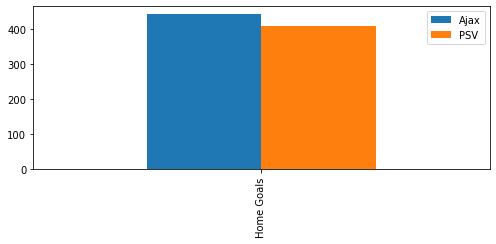

In [1496]:
plotdata = pd.DataFrame({
    "Ajax": len(ajaxGoalsHome.index),
    "PSV": len(psvGoalsHome.index)
    }, 
    index=["Home Goals"]
)
plotdata.plot(kind="bar")

<AxesSubplot:>

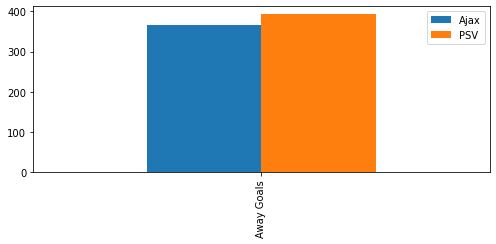

In [1497]:
plotdata = pd.DataFrame({
    "Ajax": len(ajaxGoalsAway.index),
    "PSV": len(psvGoalsAway.index)
    }, 
    index=["Away Goals"]
)
plotdata.plot(kind="bar")